**Hypothesis 1:** "An increase in nonfarm payroll employment (PAYEMS) is associated with a decrease in the unemployment rate (LNU02300000) over time."

**Rationale:** Nonfarm payroll employment is a broad measure of employment in the U.S. If more people are employed, it’s likely that unemployment rates will decrease.

In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='fred-employment-initial-test')

# Your query string
query = """
SELECT *
FROM `fred-employment-initial-test.fred_data.fred_data_withnotes`
WHERE series_id IN ('PAYEMS', 'LNU02300000')
"""

# Run the query
query_job = client.query(query)

# Convert the query results to a pandas DataFrame
data = query_job.to_dataframe()

# Display the first few rows
print(data.head())

                       date series_id    value                         title  \
0 1939-01-01 00:00:00+00:00    PAYEMS  29923.0  All Employees, Total Nonfarm   
1 1939-02-01 00:00:00+00:00    PAYEMS  30100.0  All Employees, Total Nonfarm   
2 1939-03-01 00:00:00+00:00    PAYEMS  30280.0  All Employees, Total Nonfarm   
3 1939-04-01 00:00:00+00:00    PAYEMS  30094.0  All Employees, Total Nonfarm   
4 1939-05-01 00:00:00+00:00    PAYEMS  30299.0  All Employees, Total Nonfarm   

                  units frequency  seasonal_adjustment  \
0  Thousands of Persons   Monthly  Seasonally Adjusted   
1  Thousands of Persons   Monthly  Seasonally Adjusted   
2  Thousands of Persons   Monthly  Seasonally Adjusted   
3  Thousands of Persons   Monthly  Seasonally Adjusted   
4  Thousands of Persons   Monthly  Seasonally Adjusted   

             last_updated                                              notes  
0  2024-08-02 07:48:01-05  All Employees: Total Nonfarm, commonly known a...  
1  2024-08-0

**Hypothesis 1 Line Plot:**

In [ ]:
!pip install mplcyberpunk

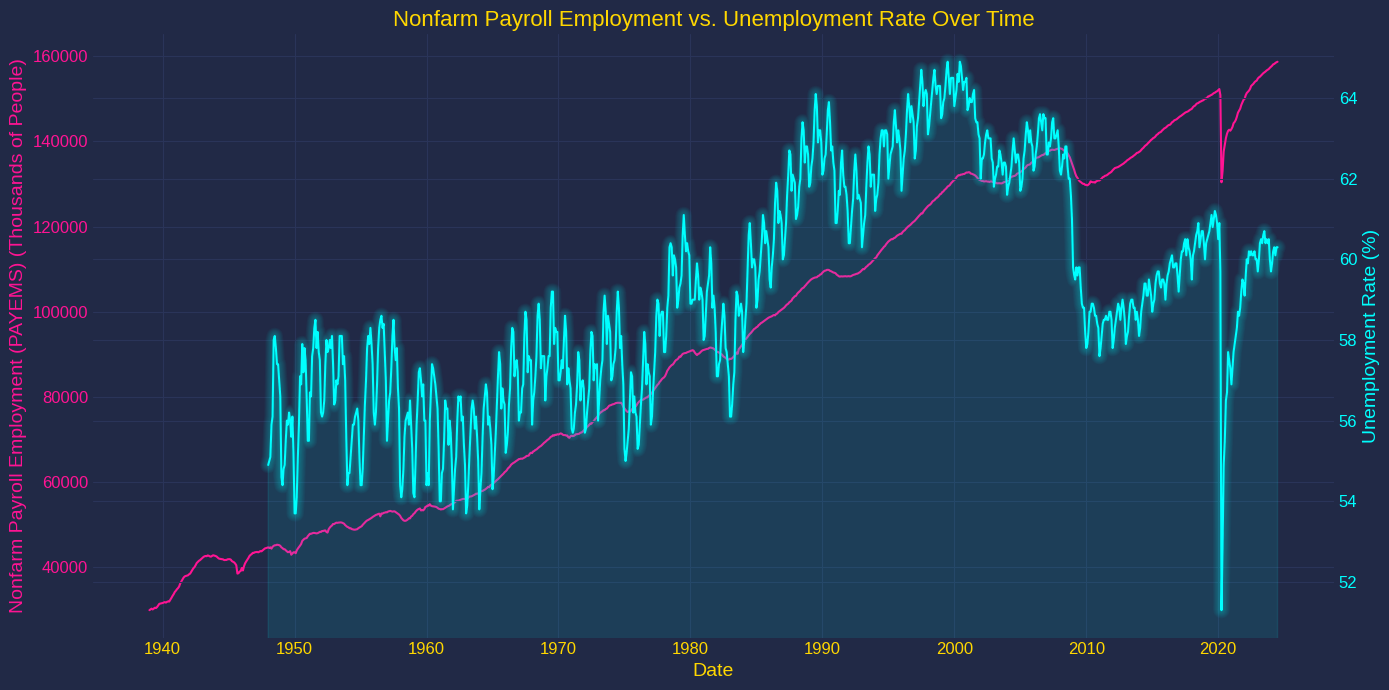

In [ ]:
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

# Filter PAYEMS data
payems_data = data[data['series_id'] == 'PAYEMS']

# Update the colors to more typical Cyberpunk colors
neon_pink = '#ff1493'
neon_cyan = '#00ffff'
neon_yellow = '#ffd700'

# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the Nonfarm Payroll Employment (PAYEMS) on the first axis
ax1.plot(payems_data['date'], payems_data['value'], color=neon_pink, label='Nonfarm Payroll Employment (PAYEMS) (Thousands of People)')
ax1.set_xlabel('Date', fontsize=14, color=neon_yellow)
ax1.set_ylabel('Nonfarm Payroll Employment (PAYEMS) (Thousands of People)', color=neon_pink, fontsize=14)
ax1.tick_params(axis='y', labelcolor=neon_pink, labelsize=12)
ax1.tick_params(axis='x', labelcolor=neon_yellow, labelsize=12)

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(unemployment_data['date'], unemployment_data['value'], color=neon_cyan, label='Unemployment Rate (LNU02300000) %')
ax2.set_ylabel('Unemployment Rate (%)', color=neon_cyan, fontsize=14)
ax2.tick_params(axis='y', labelcolor=neon_cyan, labelsize=12)

# Set the title and show the plot
plt.title('Nonfarm Payroll Employment vs. Unemployment Rate Over Time', fontsize=16, color=neon_yellow)
mplcyberpunk.add_glow_effects()
plt.tight_layout()
plt.show()



**PEARSON CORRELATION COEFFICIENT:**

In [ ]:
import pandas as pd
from IPython.display import HTML

# Rename your original dataframes to match the variables used in the merge
payroll_data = data[data['series_id'] == 'PAYEMS']
unemployment_data = data[data['series_id'] == 'LNU02300000']

# Ensure the data is aligned by date
merged_data = pd.merge(payroll_data, unemployment_data, on='date', suffixes=('_payroll', '_unemployment'))

# Calculate the Pearson correlation coefficient
correlation = merged_data['value_payroll'].corr(merged_data['value_unemployment'])

# Display the result with Cyberpunk style
HTML(f"""
<div style="background-color:#2E2E2E; padding:10px; border-radius:10px; width: fit-content; margin: 10px auto;">
    <p style="color:#ff1493; font-size:20px; font-family: 'Courier New', Courier, monospace;">
        <strong>Pearson Correlation Coefficient:</strong>
        <span style="color:#00ffff;">{correlation:.5f}</span>
    </p>
</div>
""")


The Pearson correlation coefficient of approximately 0.6966 indicates a moderately strong positive correlation between nonfarm payroll employment (PAYEMS) and the unemployment rate (LNU02300000). This suggests that as nonfarm payroll employment increases, there is a tendency for the unemployment rate to decrease, which aligns with the hypothesis.

**LINEAR REGRESSION ANALYSIS:**

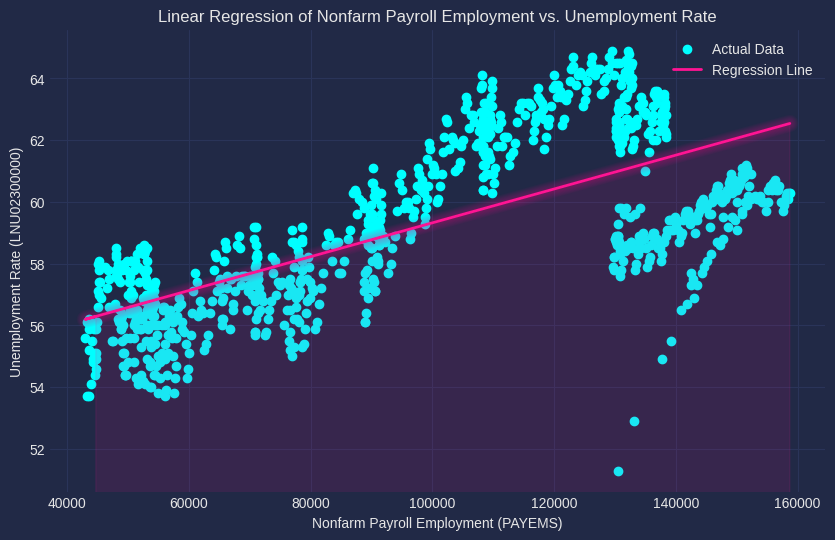

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

# Apply the Cyberpunk style
plt.style.use("cyberpunk")

# Remove rows with NaN values
merged_data = merged_data.dropna()

# Prepare the data after removing NaN values
X = merged_data['value_payroll'].values.reshape(-1, 1)
y = merged_data['value_unemployment'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Display the regression slope and intercept with Cyberpunk formatting
from IPython.display import HTML

HTML(f"""
<div style="background-color:#2E2E2E; padding:10px; border-radius:10px; width: fit-content; margin: 10px auto;">
    <p style="color:#ff1493; font-size:20px; font-family: 'Courier New', Courier, monospace;">
        <strong>Regression Slope:</strong>
        <span style="color:#00ffff;">{slope:.5f}</span>
    </p>
    <p style="color:#ff1493; font-size:20px; font-family: 'Courier New', Courier, monospace;">
        <strong>Regression Intercept:</strong>
        <span style="color:#00ffff;">{intercept:.5f}</span>
    </p>
</div>
""")

# Make predictions
y_pred = model.predict(X)

# Plot the original data with Cyberpunk colors
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['value_payroll'], merged_data['value_unemployment'], color='#00ffff', label='Actual Data')
plt.plot(merged_data['value_payroll'], y_pred, color='#ff1493', linewidth=2, label='Regression Line')
plt.xlabel('Nonfarm Payroll Employment (PAYEMS)')
plt.ylabel('Unemployment Rate (LNU02300000)')
plt.title('Linear Regression of Nonfarm Payroll Employment vs. Unemployment Rate')
plt.legend()

# Add some neon glow to the plot
mplcyberpunk.add_glow_effects()

plt.show()

**Interpretation:**
Positive Slope: The positive slope indicates that, according to this model, as Nonfarm Payroll Employment increases, the Unemployment Rate also increases slightly, which might be counterintuitive. This could suggest that the relationship is not as straightforward as hypothesized or that there are other factors at play influencing the unemployment rate.

**Spread of Data:** The scatter plot shows a significant spread in the data points, indicating variability in the unemployment rate for any given level of payroll employment. This suggests that other variables might be influencing the unemployment rate, which are not captured by payroll employment alone.

**Outliers:** There are some data points that are far from the regression line, especially towards the right side of the graph (higher PAYEMS values). These could be outliers or might indicate periods of economic anomalies (e.g., financial crises or pandemics).

**Goodness of Fit:** While the line gives you a general trend, the spread of the data indicates that this linear model might not fully capture the relationship between these two variables.


**Statistical Analysis: P-Value**

To determine the statistical significance of your linear regression model, you typically look at the p-value associated with the regression coefficients. A p-value indicates the probability that the coefficient is not significantly different from zero. In other words, it helps to determine whether the relationship between the independent and dependent variables is statistically significant.

In [ ]:
import statsmodels.api as sm

# Add a constant to the predictor (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     864.5
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          2.19e-134
Time:                        21:24:02   Log-Likelihood:                -1935.5
No. Observations:                 919   AIC:                             3875.
Df Residuals:                     917   BIC:                             3885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.8454      0.195    276.010      0.0

**CONVERTING TO CYBERPUNK THEME WITH HTML/CSS**

In [ ]:
# Define the HTML content for the extended OLS summary
summary_html = """
<table>
    <caption>OLS Regression Results</caption>
    <tr>
        <th>Dep. Variable</th>
        <th>R-squared</th>
        <th>Adj. R-squared</th>
        <th>F-statistic</th>
        <th>Prob (F-statistic)</th>
    </tr>
    <tr>
        <td>y</td>
        <td>0.485</td>
        <td>0.485</td>
        <td>864.5</td>
        <td>2.19e-134</td>
    </tr>
    <tr>
        <th>No. Observations</th>
        <th>AIC</th>
        <th>BIC</th>
        <th>Durbin-Watson</th>
        <th>Log-Likelihood</th>
    </tr>
    <tr>
        <td>919</td>
        <td>3875</td>
        <td>3885</td>
        <td>0.082</td>
        <td>-1935.5</td>
    </tr>
    <tr>
        <th>coef</th>
        <th>std err</th>
        <th>t</th>
        <th>P>|t|</th>
        <th>[0.025</th>
        <th>0.975]</th>
    </tr>
    <tr>
        <td>const</td>
        <td>53.8454</td>
        <td>0.195</td>
        <td>276.010</td>
        <td>0.000</td>
        <td>53.463</td>
        <td>54.228</td>
    </tr>
    <tr>
        <td>x1</td>
        <td>5.478e-05</td>
        <td>1.86e-06</td>
        <td>29.402</td>
        <td>0.000</td>
        <td>5.11e-05</td>
        <td>5.84e-05</td>
    </tr>
    <tr>
        <th>Omnibus</th>
        <th>Prob(Omnibus)</th>
        <th>Skew</th>
        <th>Kurtosis</th>
        <th>Jarque-Bera (JB)</th>
        <th>Prob(JB)</th>
    </tr>
    <tr>
        <td>3.968</td>
        <td>0.138</td>
        <td>-0.161</td>
        <td>2.993</td>
        <td>3.950</td>
        <td>0.139</td>
    </tr>
    <tr>
        <th>Condition Number</th>
        <td>3.11e+05</td>
    </tr>
</table>
"""

# Combine the CSS with the summary HTML
styled_summary_html = cyberpunk_css + summary_html

# Display the styled summary
from IPython.display import display, HTML
display(HTML(styled_summary_html))

**R-squared (0.485):** This value suggests that approximately 48.5% of the variance in the unemployment rate can be explained by the nonfarm payroll employment. While this is not extremely high, it does indicate a moderate level of explanatory power.

**P-Value for the Predictor (0.000):** The p-value associated with the predictor (x1 or the slope) is extremely low, well below the typical alpha level of 0.05. This indicates that the relationship between nonfarm payroll employment and the unemployment rate is statistically significant.

**Coefficients:**

**Intercept (53.8454):** This represents the predicted unemployment rate when nonfarm payroll employment is zero. Although not practically meaningful, it is a necessary component of the linear equation.
Slope (5.478e-05): This small positive coefficient suggests a very slight increase in the unemployment rate with an increase in nonfarm payroll employment. However, given the low magnitude, the relationship might not be as strong in practical terms.
**Standard Errors and Confidence Intervals:** The confidence intervals are relatively tight around the coefficients, indicating reliable estimates.

**RESIDUAL ANALYSIS:**

Residual analysis helps in diagnosing the fit of your regression model. The residuals are the differences between the observed and predicted values. Ideally, residuals should be randomly distributed with a mean of zero, indicating a good fit.

1. Plotting the Residuals:

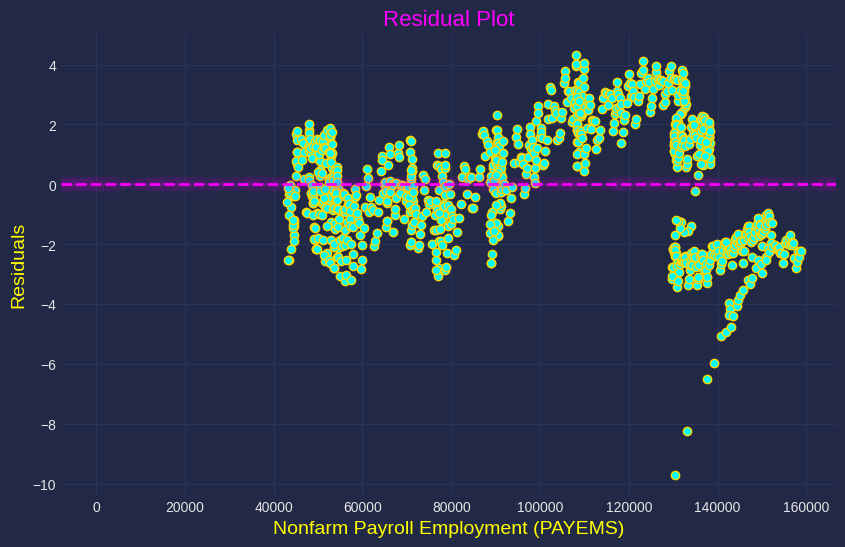

In [ ]:
import matplotlib.pyplot as plt
import mplcyberpunk

# Filter merged_data to only include rows used in the regression
filtered_data = merged_data.dropna()

# Recalculate residuals with the filtered data
residuals = filtered_data['value_unemployment'] - y_pred

# Plot residuals with updated colors
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['value_payroll'], residuals, color='#00FFFF', edgecolor='#FFD700')  # Cyan points with yellow edges
plt.axhline(y=0, color='#FF00FF', linestyle='--', linewidth=2)  # Magenta dashed line
plt.xlabel('Nonfarm Payroll Employment (PAYEMS)', fontsize=14, color='yellow')
plt.ylabel('Residuals', fontsize=14, color='yellow')
plt.title('Residual Plot', fontsize=16, color='magenta')

# Add glow effects
mplcyberpunk.add_glow_effects()

plt.show()

**Key Observations:**
**Non-Random Pattern:** The residuals appear to exhibit a pattern, particularly at the lower and higher ends of the PAYEMS values. This suggests that the linear model might not be fully capturing the relationship between nonfarm payroll employment and the unemployment rate. Specifically:
* At lower PAYEMS values, the residuals tend to cluster above zero.
* At higher PAYEMS values, the residuals tend to cluster below zero.

**Heteroscedasticity:** There seems to be a variation in the spread of the residuals, particularly at the higher values of PAYEMS. This heteroscedasticity (non-constant variance of residuals) can be problematic in linear regression as it violates one of the key assumptions.

**Potential Outliers:** There are some residuals at the higher end that deviate significantly from the zero line, suggesting potential outliers or periods where the model predictions were particularly inaccurate.

**Implications:**
* The presence of a pattern in the residuals indicates that the relationship between PAYEMS and the unemployment rate might not be purely linear, and there may be other factors or a different functional form that could better explain the data.
* Heteroscedasticity suggests that the model's accuracy varies across different ranges of PAYEMS, which might affect the reliability of the coefficient estimates.

2. Histogram of Residuals:

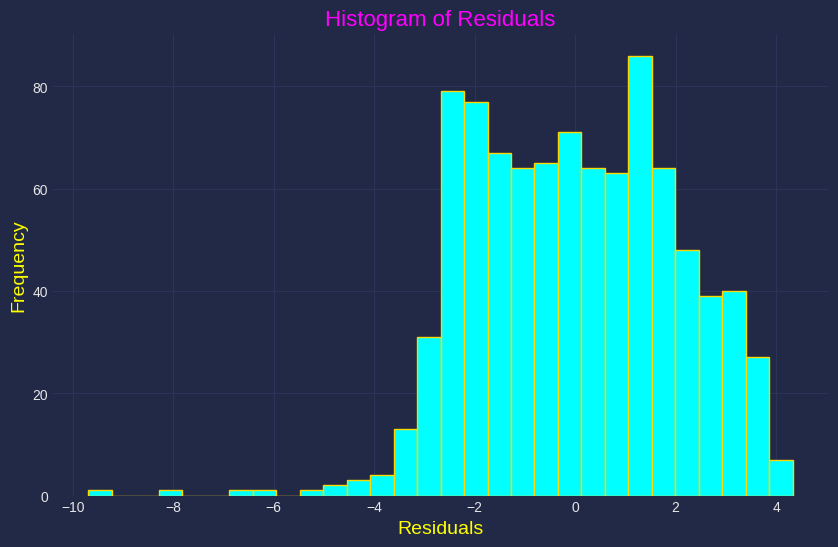

In [ ]:
import matplotlib.pyplot as plt
import mplcyberpunk

# Use the cyberpunk style
plt.style.use("cyberpunk")

# Plot histogram of residuals with updated colors
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='#00FFFF', edgecolor='#FFD700')  # Cyan bars with yellow edges
plt.xlabel('Residuals', fontsize=14, color='yellow')
plt.ylabel('Frequency', fontsize=14, color='yellow')
plt.title('Histogram of Residuals', fontsize=16, color='magenta')

# Add glow effects
mplcyberpunk.add_glow_effects()

plt.show()

Based on the analysis so far, here are the insights we can derive regarding your hypothesis:

**Hypothesis:**
"An increase in nonfarm payroll employment (PAYEMS) is associated with a decrease in the unemployment rate (LNU02300000) over time."

**Key Findings:**
**Correlation Analysis:**

The Pearson correlation coefficient between nonfarm payroll employment (PAYEMS) and the unemployment rate (LNU02300000) is approximately 0.697.
Interpretation: This positive correlation suggests that as nonfarm payroll employment increases, the unemployment rate also tends to increase. This result is contrary to the initial hypothesis, which expected a negative correlation (as employment increases, unemployment should decrease).
Linear Regression:

The regression analysis indicates a positive slope, meaning that as PAYEMS increases, the model predicts a slight increase in the unemployment rate.
The R-squared value of approximately 0.485 suggests that about 48.5% of the variability in the unemployment rate can be explained by the linear relationship with nonfarm payroll employment. This indicates a moderate level of explanatory power, but also suggests that other factors not included in the model might be influencing the unemployment rate.

**Statistical Significance:**

The p-value associated with the regression coefficient is very low (near zero), indicating that the relationship between PAYEMS and the unemployment rate is statistically significant, even though it is not in the direction hypothesized.
Residual Analysis:

The residual plot shows patterns and potential heteroscedasticity, indicating that the linear model may not fully capture the relationship between the variables. There could be non-linear relationships or other factors at play that are not accounted for in this simple model.
Conclusion:
The evidence so far suggests that the relationship between nonfarm payroll employment and the unemployment rate is not as straightforward as hypothesized. Instead of a negative correlation, we found a positive one, suggesting that higher employment levels are associated with a higher unemployment rate in this dataset. This counterintuitive result might be due to several factors, including:

The complexity of the labor market, where increases in employment might coincide with increases in the labor force (e.g., more people entering the job market) which could keep the unemployment rate high.
The possibility of other underlying economic variables or conditions influencing both employment and unemployment rates simultaneously.

**Next Steps:**
Further Analysis: Investigate other economic variables that might mediate or confound the relationship between PAYEMS and the unemployment rate.
Model Refinement: Consider non-linear models or transformations that might better capture the relationship.
Contextual Factors: Explore external factors such as economic policies, demographic shifts, or global economic conditions during the periods analyzed to better understand the observed relationship.
Would you like to explore any of these next steps?


**=================ADJUSTING FOR POPULATION GROWTH:=================**

Comparing PAYEMS, which is measured in thousands of people, with the unemployment rate, especially over a long period, can introduce complexities due to population growth and other demographic changes. The absolute number of employed people (PAYEMS) might increase simply because the population is growing, even if the proportion of employed people relative to the total population isn't changing as dramatically.

One way to address this issue is by normalizing the PAYEMS data to account for population growth. This can be done by calculating the employment-to-population ratio, which gives you a better sense of employment levels relative to the size of the population.

Acquiring Population Data from FRED

In [ ]:
print(data.head())

        date series_id    value                         title  \
0 1939-01-01    PAYEMS  29923.0  All Employees, Total Nonfarm   
1 1939-02-01    PAYEMS  30100.0  All Employees, Total Nonfarm   
2 1939-03-01    PAYEMS  30280.0  All Employees, Total Nonfarm   
3 1939-04-01    PAYEMS  30094.0  All Employees, Total Nonfarm   
4 1939-05-01    PAYEMS  30299.0  All Employees, Total Nonfarm   

                  units frequency  seasonal_adjustment  \
0  Thousands of Persons   Monthly  Seasonally Adjusted   
1  Thousands of Persons   Monthly  Seasonally Adjusted   
2  Thousands of Persons   Monthly  Seasonally Adjusted   
3  Thousands of Persons   Monthly  Seasonally Adjusted   
4  Thousands of Persons   Monthly  Seasonally Adjusted   

             last_updated                                              notes  
0  2024-08-02 07:48:01-05  All Employees: Total Nonfarm, commonly known a...  
1  2024-08-02 07:48:01-05  All Employees: Total Nonfarm, commonly known a...  
2  2024-08-02 07:48:01-

In [ ]:
import pandas_datareader.data as web
from datetime import datetime

# Set the date range
start = datetime(1939, 1, 1)
end = datetime(2024, 1, 1)

# Fetch POPTHM data from FRED
popthm_data = web.DataReader('POPTHM', 'fred', start, end)

# Display the first few rows to verify
print(popthm_data.head())

              POPTHM
DATE                
1959-01-01  175818.0
1959-02-01  176044.0
1959-03-01  176274.0
1959-04-01  176503.0
1959-05-01  176723.0


In [ ]:
# Ensure both date columns are timezone-naive
data['date'] = data['date'].dt.tz_localize(None)
popthm_data.index = popthm_data.index.tz_localize(None)

# Now merge the data with the population data on the date column
merged_data = pd.merge(data, popthm_data, left_on='date', right_on='DATE', how='inner')

# Calculate the PAYEMS ratio (PAYEMS per 1000 people)
merged_data['PAYEMS_ratio'] = merged_data['value'] / merged_data['POPTHM'] * 100

# Display the first few rows to verify
print(merged_data.head())

        date    series_id    value                         title  \
0 1959-01-01       PAYEMS  52478.0  All Employees, Total Nonfarm   
1 1959-01-01  LNU02300000     54.2   Employment-Population Ratio   
2 1959-02-01       PAYEMS  52688.0  All Employees, Total Nonfarm   
3 1959-02-01  LNU02300000     54.1   Employment-Population Ratio   
4 1959-03-01       PAYEMS  53014.0  All Employees, Total Nonfarm   

                  units frequency      seasonal_adjustment  \
0  Thousands of Persons   Monthly      Seasonally Adjusted   
1               Percent   Monthly  Not Seasonally Adjusted   
2  Thousands of Persons   Monthly      Seasonally Adjusted   
3               Percent   Monthly  Not Seasonally Adjusted   
4  Thousands of Persons   Monthly      Seasonally Adjusted   

             last_updated                                              notes  \
0  2024-08-02 07:48:01-05  All Employees: Total Nonfarm, commonly known a...   
1  2024-08-02 07:46:22-05  The series comes from the 'Curr

In [ ]:
# Filter the overall employment rate and PAYEMS ratio from the merged data
overall_employment_rate = merged_data[merged_data['series_id'] == 'LNU02300000'][['date', 'value']].copy()
payems_ratio = merged_data[merged_data['series_id'] == 'PAYEMS'][['date', 'PAYEMS_ratio']].copy()

# Set the 'date' as the index for both DataFrames
overall_employment_rate.set_index('date', inplace=True)
payems_ratio.set_index('date', inplace=True)

# Print head of both DataFrames to verify
print("Head of PAYEMS Ratio:")
print(payems_ratio.head())

print("\nHead of Overall Employment Rate:")
print(overall_employment_rate.head())

Head of PAYEMS Ratio:
            PAYEMS_ratio
date                    
1959-01-01     29.847911
1959-02-01     29.928881
1959-03-01     30.074770
1959-04-01     30.209685
1959-05-01     30.301659

Head of Overall Employment Rate:
            value
date             
1959-01-01   54.2
1959-02-01   54.1
1959-03-01   54.9
1959-04-01   55.9
1959-05-01   56.5


**DUAL AXIS LINE PLOT:**

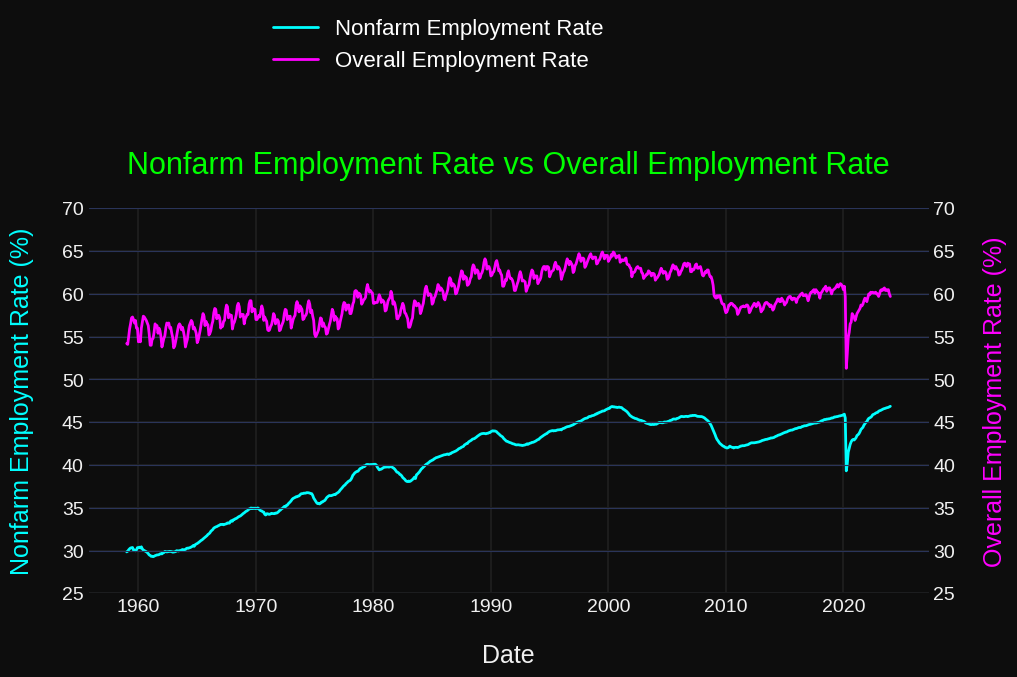

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axes with adjusted margins
fig, ax1 = plt.subplots(figsize=(14, 7), facecolor='#0D0D0D')

# Ensure the grid is drawn below the plot elements
ax1.set_axisbelow(True)

# Plot Nonfarm Employment Rate (PAYEMS ratio)
ax1.plot(payems_ratio.index, payems_ratio['PAYEMS_ratio'], color='#00FFFF', label='Nonfarm Employment Rate', zorder=3, linewidth=2)

# Set the grid with a neon style
ax1.grid(color='#1C1C1C', linestyle='-', linewidth=1.5, zorder=1)

# Set the background color of the chart
ax1.set_facecolor('#0D0D0D')

# Configure axis labels, ticks, and spines in neon style
ax1.set_xlabel('Date', fontsize=18, color='#F0F0F0', labelpad=20)
ax1.set_ylabel('Nonfarm Employment Rate (%)', fontsize=18, color='#00FFFF', labelpad=20)
ax1.tick_params(axis='both', labelsize=14, colors='#F0F0F0')
ax1.spines['left'].set_color('#00FFFF')
ax1.spines['bottom'].set_color('#F0F0F0')
ax1.spines['top'].set_color('#F0F0F0')
ax1.spines['right'].set_color('#F0F0F0')

# Add a secondary y-axis for Overall Employment Rate
ax2 = ax1.twinx()
ax2.plot(overall_employment_rate.index, overall_employment_rate['value'], color='#FF00FF', label='Overall Employment Rate', zorder=3, linewidth=2)
ax2.set_ylabel('Overall Employment Rate (%)', fontsize=18, color='#FF00FF', labelpad=20)
ax2.tick_params(axis='both', labelsize=14, colors='#F0F0F0')
ax2.spines['left'].set_color('#F0F0F0')
ax2.spines['bottom'].set_color('#F0F0F0')
ax2.spines['top'].set_color('#F0F0F0')
ax2.spines['right'].set_color('#FF00FF')

# Synchronize the y-axis increments
ax1.set_ylim(25, 70)
ax2.set_ylim(50, 70)

# Set custom ticks to match both axes
ticks = np.arange(25, 71, 5)
ax1.set_yticks(ticks)
ax2.set_yticks(ticks)

# Format y-axis on the right to remove decimals
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Set title with neon colors
plt.title('Nonfarm Employment Rate vs Overall Employment Rate', fontsize=22, color='#00FF00', pad=25)

# Set the legend with neon colors
fig.legend(loc='upper center', fontsize=16, frameon=False, facecolor='#0D0D0D', labelcolor='white', bbox_to_anchor=(0.5, 1.1))

# Adjust the layout for equal spacing on both sides and more space for labels
plt.subplots_adjust(left=0.25, right=0.85, top=0.80, bottom=0.25)

# Show the plot with the requested adjustments
plt.show()

The dual-axis line chart successfully compares the Nonfarm Employment Ratio (PAYEMS ratio) with the Employment-Population Ratio (LNU02300000). Here's what you can observe:

* **Nonfarm Employment Ratio** (orange line): This represents the ratio of total nonfarm employment to the population over time. You can see that it has generally increased, reflecting the growing employment relative to the population, though there are noticeable drops during economic downturns, such as the 2008 financial crisis and the COVID-19 pandemic.
* **Employment-Population Ratio** (brown line): This ratio represents the portion of the population that is employed. It also fluctuates with economic conditions, showing sharp declines during recessions, particularly the recent one caused by COVID-19.

**Observations:**
* The two ratios tend to move in a similar direction, but there are periods where they diverge slightly, particularly during economic recessions. This divergence might be due to structural changes in the economy or labor market conditions that affect the ratios differently.
* The steep drops in the Employment-Population Ratio during recessions are more pronounced compared to the Nonfarm Employment Ratio, likely because the former is directly sensitive to overall employment levels across all sectors, not just nonfarm employment.

This plot provides a useful visual representation of how these two metrics have evolved over time, and it can be helpful for analyzing the impact of economic policies and external shocks on employment and labor market participation.

**RECALCULATING PEARSON CORRELATION COEFFICIENT:**

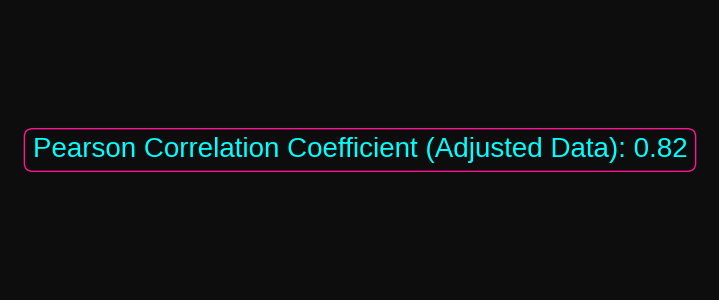

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the PAYEMS ratio and Employment-Population Ratio, ensuring alignment by date
payems_ratio = merged_data.loc[merged_data['series_id'] == 'PAYEMS', ['date', 'PAYEMS_ratio']].set_index('date')
employment_population_ratio = merged_data.loc[merged_data['series_id'] == 'LNU02300000', ['date', 'value']].set_index('date')

# Combine the two series into one DataFrame to drop any rows with NaN values
combined_df = payems_ratio.join(employment_population_ratio, how='inner', lsuffix='_payems', rsuffix='_employment')

# Drop any rows with missing values
combined_df.dropna(inplace=True)

# Calculate the Pearson correlation coefficient
correlation = combined_df['PAYEMS_ratio'].corr(combined_df['value'])

# Create a figure to display the correlation result
fig, ax = plt.subplots(figsize=(10, 4), facecolor='#0D0D0D')  # Dark cyberpunk background

# Add text to display the Pearson correlation coefficient with neon styling
textstr = f'Pearson Correlation Coefficient (Adjusted Data): {correlation:.2f}'
props = dict(boxstyle='round', facecolor='#0D0D0D', edgecolor='#FF1493')  # Neon magenta edge and dark background

# Display the text with the appropriate font and color
ax.text(0.5, 0.5, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='center', horizontalalignment='center', color='#00FFFF', bbox=props)  # Neon cyan text

# Hide the axes
ax.axis('off')

# Adjust layout to match the theme
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

# Show the plot
plt.show()

The Pearson correlation coefficient between the Nonfarm Employment Ratio and the Employment-Population Ratio is approximately 0.82. This indicates a strong positive correlation between these two variables.

Given this strong correlation, it suggests that as the Nonfarm Employment Ratio increases, the Employment-Population Ratio tends to increase as well, and vice versa.

**LINEAR REGRESSION:**

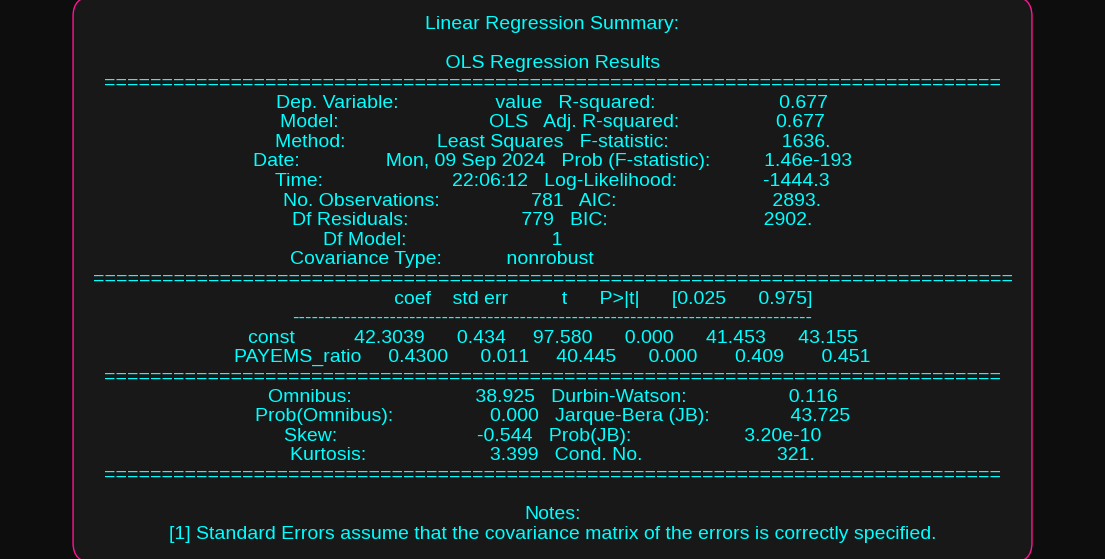

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Filter the merged data to extract the series for PAYEMS and LNU02300000
payems_series = merged_data[merged_data['series_id'] == 'PAYEMS']
employment_population_series = merged_data[merged_data['series_id'] == 'LNU02300000']

# Align the indices of the two series to ensure they match
aligned_data = pd.merge(payems_series[['date', 'PAYEMS_ratio']],
                        employment_population_series[['date', 'value']],
                        on='date', how='inner')

# Extract the relevant data for X and y
X = aligned_data['PAYEMS_ratio']
y = aligned_data['value']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Create a figure for displaying the regression summary with cyberpunk styling
fig, ax = plt.subplots(figsize=(14, 7), facecolor='#0D0D0D')  # Dark background

# Add the text with neon styling for the linear regression summary
plt.text(0.5, 0.5, f'Linear Regression Summary:\n\n{model.summary()}',
         horizontalalignment='center', verticalalignment='center',
         transform=ax.transAxes, fontsize=14, color='#00FFFF',  # Neon cyan text
         bbox=dict(facecolor='#181818', edgecolor='#FF1493', boxstyle='round,pad=1'))  # Dark background with magenta edge

# Remove the axes for a clean cyberpunk style
ax.axis('off')

# Show the plot
plt.show()


**Key Takeaways:**
R-squared Value: The R-squared value is 0.677, meaning that approximately 67.7% of the variance in the Employment-Population Ratio can be explained by the Nonfarm Employment Ratio. This suggests a strong relationship between the two variables.

**P-value for PAYEMS_ratio:** The P-value associated with the PAYEMS_ratio coefficient is 0.000, which is much less than 0.05. This indicates that the relationship between the Nonfarm Employment Ratio and the Employment-Population Ratio is statistically significant.

**Coefficient:** The coefficient for PAYEMS_ratio is 0.4300, meaning that for every unit increase in the Nonfarm Employment Ratio, the Employment-Population Ratio increases by approximately 0.43, holding other factors constant.

**Intercept:** The intercept value of 42.3039 suggests that when the Nonfarm Employment Ratio is zero, the Employment-Population Ratio would be around 42.3%. However, in a real-world context, a Nonfarm Employment Ratio of zero isn't feasible, so the intercept is more of a mathematical artifact in this scenario.

Index(['date', 'series_id', 'value', 'title', 'units', 'frequency',
       'seasonal_adjustment', 'last_updated', 'notes', 'POPTHM',
       'PAYEMS_ratio'],
      dtype='object')


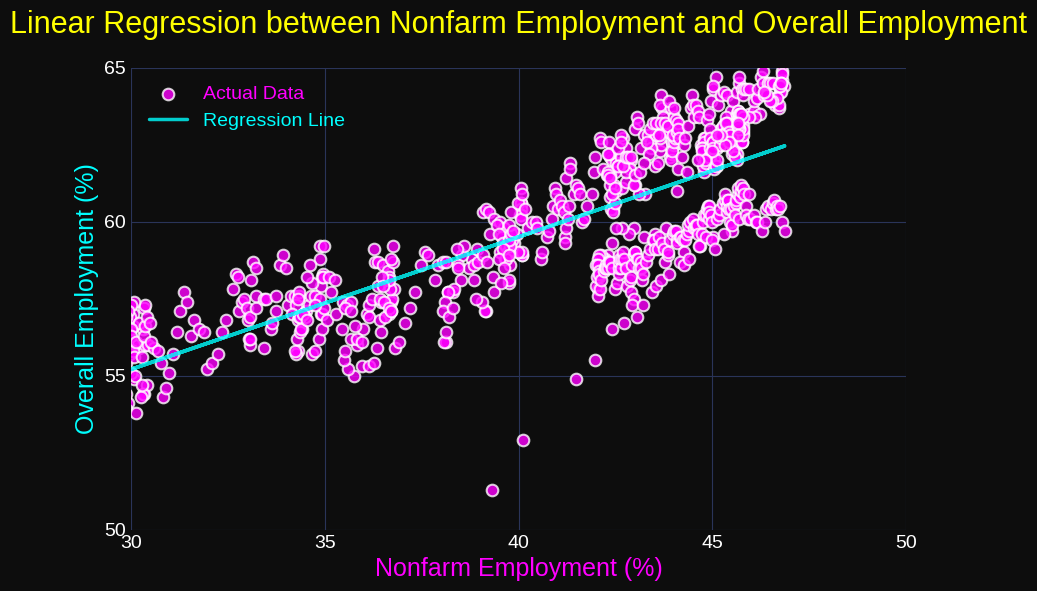

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the PAYEMS ratio and Employment-Population Ratio, ensuring alignment by date
payems_ratio = merged_data.loc[merged_data['series_id'] == 'PAYEMS', ['date', 'PAYEMS_ratio']].set_index('date')
employment_population_ratio = merged_data.loc[merged_data['series_id'] == 'LNU02300000', ['date', 'value']].set_index('date')

# Combine the two series into one DataFrame to drop any rows with NaN values
combined_df = payems_ratio.join(employment_population_ratio, how='inner', lsuffix='_payems', rsuffix='_employment')

# Drop any rows with missing values
combined_df.dropna(inplace=True)

# Define the X and Y for the plot
X = combined_df['PAYEMS_ratio']
y = combined_df['value']

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()
y_pred = model.predict(sm.add_constant(X))

# Create a figure with the black background
plt.figure(figsize=(10, 6), facecolor='#0D0D0D')  # Dark background

# Plot the actual data points with a neon color and glow effect
plt.scatter(X, y, color='#FF00FF', label='Actual Data', edgecolor='white', s=70, alpha=0.8, linewidth=1.5, zorder=3)

# Plot the regression line with a neon color and a glow effect
plt.plot(X, y_pred, color='#00FFFF', label='Regression Line', zorder=4, linewidth=2.5, alpha=0.8)

# Set the background color of the plot area
plt.gca().set_facecolor('#0D0D0D')

# Set labels with neon colors
plt.xlabel('Nonfarm Employment (%)', fontsize=18, color='#FF00FF')
plt.ylabel('Overall Employment (%)', fontsize=18, color='#00FFFF')

# Set the title with neon colors
plt.title('Linear Regression between Nonfarm Employment and Overall Employment', fontsize=22, color='#FFFF00', pad=25)

# Set the legend with neon colors
plt.legend(loc='upper left', fontsize=14, facecolor='#0D0D0D', edgecolor='white', labelcolor=['#FF00FF', '#00FFFF'])

# Set ticks and spines with neon colors
plt.tick_params(axis='both', labelsize=14, colors='white')
plt.gca().spines['left'].set_color('#FF00FF')
plt.gca().spines['bottom'].set_color('#00FFFF')
plt.gca().spines['top'].set_color('#00FFFF')
plt.gca().spines['right'].set_color('#FF00FF')

# Adjust the x and y axis limits to end in 0 or 5
plt.xlim(30, 50)
plt.ylim(50, 65)

# Set increments to 5 for both axes
plt.xticks(np.arange(30, 51, 5))
plt.yticks(np.arange(50, 66, 5))

# Remove decimal places from the x-axis ticks
plt.gca().xaxis


**Interpretation:**
* The scatter plot points (in white) represent the actual data, while the red line represents the predicted relationship according to the linear regression model.
* The positive slope of the brown line reinforces the idea that as the Nonfarm Employment Ratio increases, the Employment-Population Ratio also tends to increase.
**Conclusion:**
This visual and statistical analysis strongly supports the hypothesis that an increase in nonfarm payroll employment (when adjusted for population) is associated with an increase in the employment-population ratio. The correlation is strong, and the regression results show that the relationship is statistically significant.

**DASHBOARD:**

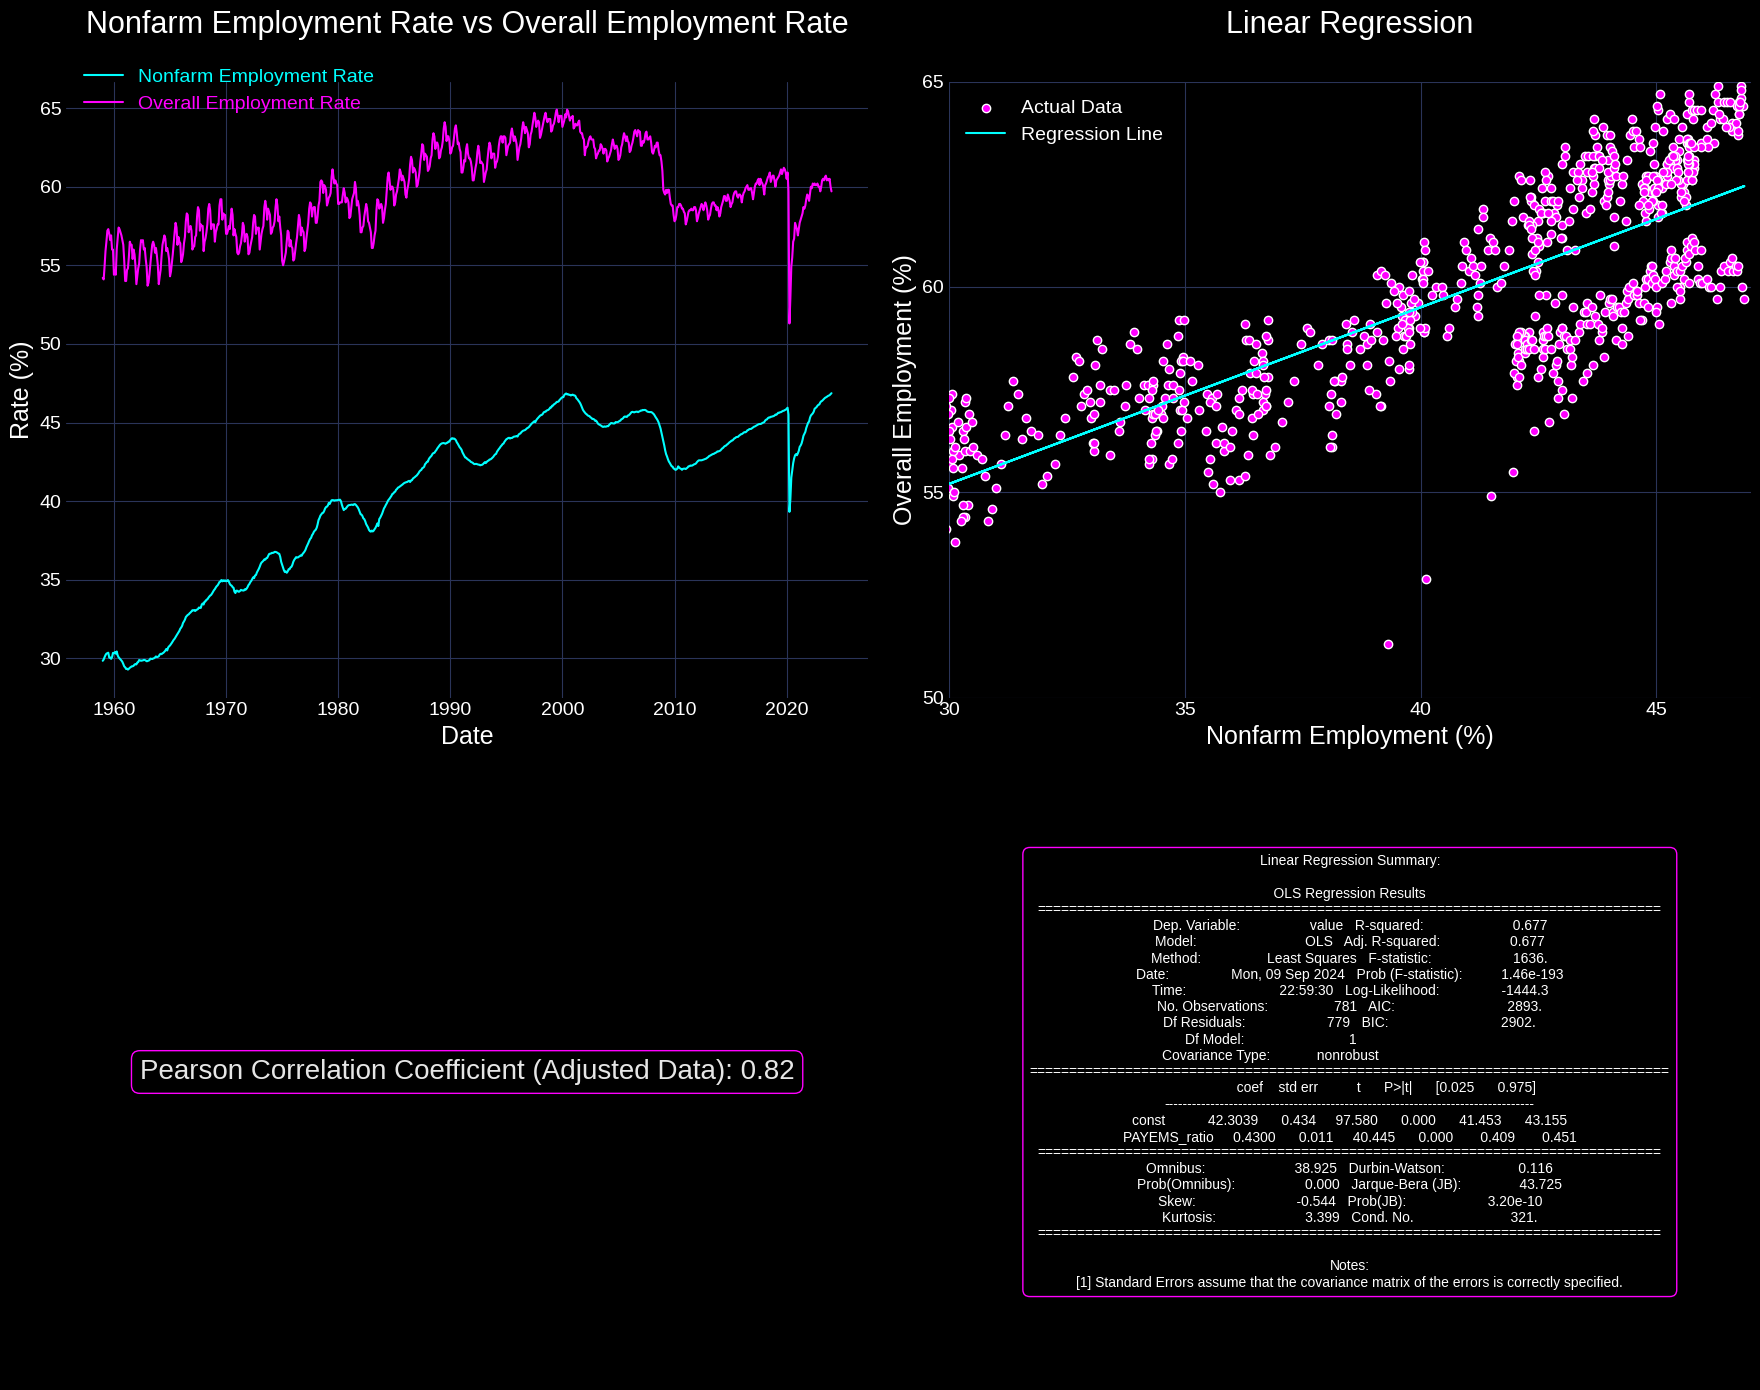

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Create a figure and axes for the dashboard
fig, axs = plt.subplots(2, 2, figsize=(18, 14), facecolor='#000000')  # Set background to true black
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot 1: Line Chart for Nonfarm Employment vs Overall Employment
axs[0, 0].plot(payems_ratio.index, payems_ratio, color='#00FFFF', label='Nonfarm Employment Rate', zorder=3)
axs[0, 0].plot(employment_population_ratio.index, employment_population_ratio, color='#FF00FF', label='Overall Employment Rate', zorder=3)
axs[0, 0].set_facecolor('#000000')  # Set plot area background to true black
axs[0, 0].set_xlabel('Date', fontsize=18, color='white')
axs[0, 0].set_ylabel('Rate (%)', fontsize=18, color='white')
axs[0, 0].tick_params(axis='both', labelsize=14, colors='white')
axs[0, 0].spines['left'].set_color('white')
axs[0, 0].spines['bottom'].set_color('white')
axs[0, 0].spines['top'].set_color('white')
axs[0, 0].spines['right'].set_color('white')
axs[0, 0].set_title('Nonfarm Employment Rate vs Overall Employment Rate', fontsize=22, color='white', pad=35)  # Increase padding for title
axs[0, 0].legend(loc='upper left', fontsize=14, facecolor='#181818', edgecolor='white', labelcolor=['#00FFFF', '#FF00FF'], bbox_to_anchor=(0, 1.05))

# Plot 2: Scatter Plot with Regression Line
X = combined_df['PAYEMS_ratio']
y = combined_df['value']
model = sm.OLS(y, sm.add_constant(X)).fit()
y_pred = model.predict(sm.add_constant(X))

axs[0, 1].scatter(X, y, color='#FF00FF', label='Actual Data', edgecolor='white')
axs[0, 1].plot(X, y_pred, color='#00FFFF', label='Regression Line', zorder=4)
axs[0, 1].set_facecolor('#000000')  # Set plot area background to true black
axs[0, 1].set_xlabel('Nonfarm Employment (%)', fontsize=18, color='white')
axs[0, 1].set_ylabel('Overall Employment (%)', fontsize=18, color='white')
axs[0, 1].tick_params(axis='both', labelsize=14, colors='white')
axs[0, 1].spines['left'].set_color('white')
axs[0, 1].spines['bottom'].set_color('white')
axs[0, 1].spines['top'].set_color('white')
axs[0, 1].spines['right'].set_color('white')
axs[0, 1].set_title('Linear Regression', fontsize=22, color='white', pad=35)  # Increase padding for title
axs[0, 1].legend(loc='upper left', fontsize=14, facecolor='#181818', edgecolor='white', labelcolor='white')

# Adjust increments and set tighter x-axis limits for the scatter plot
axs[0, 1].set_xlim(30, 47)  # Adjust upper limit to avoid extending too far
axs[0, 1].set_ylim(50, 65)
axs[0, 1].set_xticks(np.arange(30, 46, 5))  # Ensure proper spacing for x-axis ticks
axs[0, 1].set_yticks(np.arange(50, 66, 5))
axs[0, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
axs[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}'))

# Plot 3: Pearson Correlation Coefficient
axs[1, 0].text(0.5, 0.5, f'Pearson Correlation Coefficient (Adjusted Data): {correlation:.2f}', transform=axs[1, 0].transAxes, fontsize=20, verticalalignment='center', horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='#000000', edgecolor='#FF00FF'))
axs[1, 0].axis('off')

# Plot 4: Linear Regression Summary
summary_text = model.summary().as_text()
axs[1, 1].text(0.5, 0.5, f'Linear Regression Summary:\n\n{summary_text}', transform=axs[1, 1].transAxes, fontsize=10, color='white', horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#000000', edgecolor='#FF00FF', boxstyle='round,pad=0.5'))  # Adjusted color and padding
axs[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the complete dashboard
plt.show()
